# **Project Name - AIRBNB Booking Analysis**

**Project Type - EDA**

**Contribution - Individual**

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a
more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind
service that is used and recognized by the whole world. Data analysis on millions of listings
provided through Airbnb is a crucial factor for the company. These millions of listings generate a
lot of data - data that can be analysed and used for security, business decisions, understanding
of customers’ and providers’ (hosts) behaviour and performance on the platform, guiding
marketing initiatives, implementation of innovative additional services and much more. 

Airbnb Data Analysis is extremely important for Airbnb business as it recognizes that How Many Peoples Are Satisfying With Airbnb and How Many Are Cancelling Their Booking And Which House Get More Positive Or Negative Reviews. 

Report Of This Data Analysis Will Help Airbnb To Get Many Informations About Yheir Business.

**Define Your Business Objective?**

**Reducing The Cancellation Rate And Check Low Performing Proprties**

# **General Guidelines : -**


1.Well-structured, formatted, and commented code is required.

2.Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

3.The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
4.Each and every logic should have proper comments.

5.You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?


What is/are the insight(s) found from the chart?


Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.


You have to create at least 20 logical & meaningful charts having important insight.

# **Let's Begin !**

# **1. Know Your Data**

# Import Liabraries

In [ ]:
#importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dataset Loading


In [ ]:
file_path = "/content/drive/MyDrive/AlmaBetter Data Science/Colab Notebooks/Assignments/Module 1/Airbnb NYC 2019.csv"

In [ ]:
airbnb_data = pd.read_csv(file_path)

In [ ]:
airbnb_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Dataset Rows And Columns Count

airbnb_data.shape

(48895, 16)

In [ ]:
# Dataset Info
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Cleaning And Organising Dataset

### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(airbnb_data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
airbnb_data.fillna({'last_review':0}, inplace=True)

In [ ]:
(airbnb_data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Fixing And Cleaning minimum price=0 in price column

airbnb_data = airbnb_data.loc[airbnb_data['price']>0]

In [ ]:
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

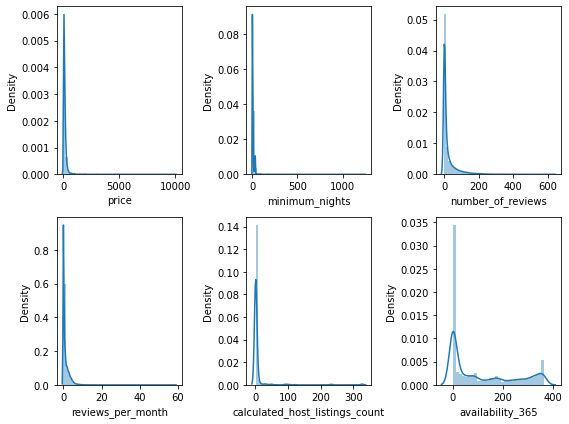

In [ ]:
#MAKING GRAPHS FOR UNDERSTAND DATA WELL
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

plt.subplot(2,3,1)
sns.distplot(airbnb_data['price'])

plt.subplot(2,3,2)
sns.distplot(airbnb_data['minimum_nights'])

plt.subplot(2,3,3)
sns.distplot(airbnb_data['number_of_reviews'])

plt.subplot(2,3,4)
sns.distplot(airbnb_data['reviews_per_month'])

plt.subplot(2,3,5)
sns.distplot(airbnb_data['calculated_host_listings_count'])

plt.subplot(2,3,6)
sns.distplot(airbnb_data['availability_365'])

plt.tight_layout() #avoid overlap of plotsplt.draw()
plt.show()

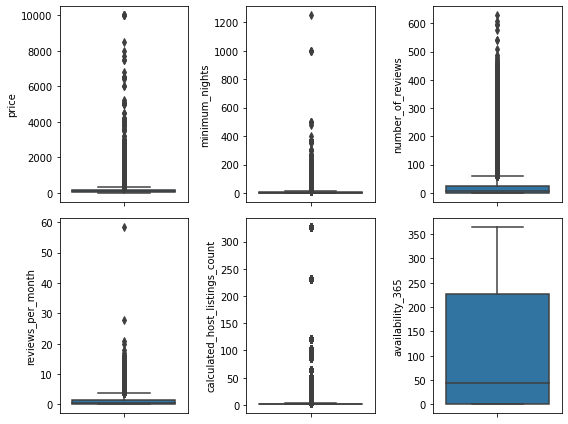

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

plt.subplot(2,3,1)
sns.boxplot(y=airbnb_data['price'])

plt.subplot(2,3,2)
sns.boxplot(y=airbnb_data['minimum_nights'])

plt.subplot(2,3,3)
sns.boxplot(y=airbnb_data['number_of_reviews'])

plt.subplot(2,3,4)
sns.boxplot(y=airbnb_data['reviews_per_month'])

plt.subplot(2,3,5)
sns.boxplot(y=airbnb_data['calculated_host_listings_count'])

plt.subplot(2,3,6)
sns.boxplot(y=airbnb_data['availability_365'])

plt.tight_layout() #avoid overlap of plotsplt.draw()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

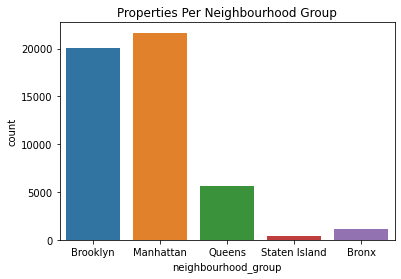

In [ ]:
title = 'Properties Per Neighbourhood Group'
sns.countplot(airbnb_data['neighbourhood_group'])
plt.title(title)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

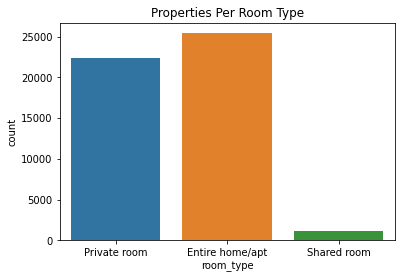

In [ ]:
title = 'Properties Per Room Type'
sns.countplot(airbnb_data['room_type'])
plt.title(title)
plt.show

Most Properties Are Private Room And Entire Home

## **3. Visualization**



*   Examine Relation Between Location And Price
*   Examine Relation Between Room Type And Price



### **3.1 Correlation**

<function matplotlib.pyplot.show(*args, **kw)>

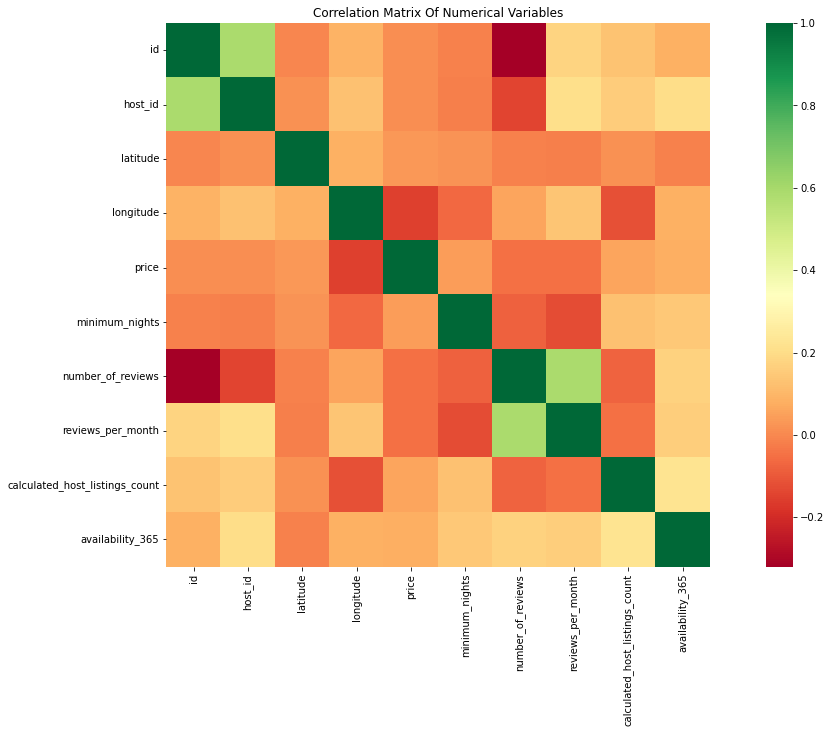

In [ ]:
plt.figure(figsize = (20,10))
title = 'Correlation Matrix Of Numerical Variables'
sns.heatmap(airbnb_data.corr(),square=True,cmap='RdYlGn')
plt.title(title)
plt.show

## **3.2 Location**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


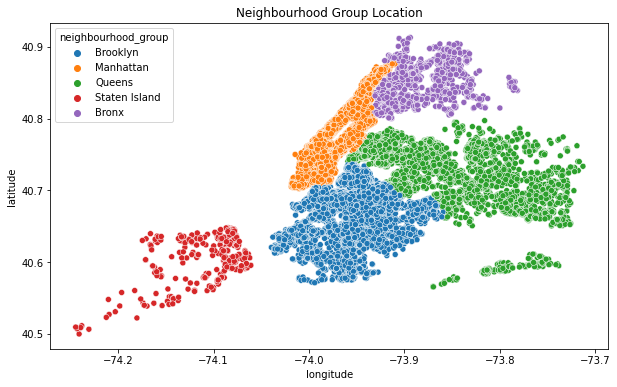

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


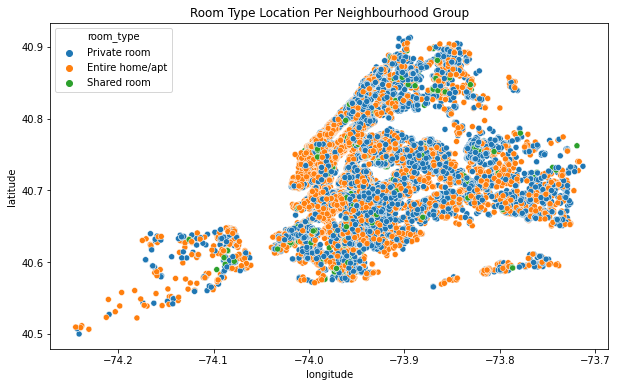

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_data.longitude,airbnb_data.latitude,hue=airbnb_data.neighbourhood_group)
plt.title(title)
plt.show()


title = 'Room Type Location Per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb_data.longitude,airbnb_data.latitude,hue=airbnb_data.room_type)
plt.title(title)
plt.show()

<Figure size 720x720 with 0 Axes>

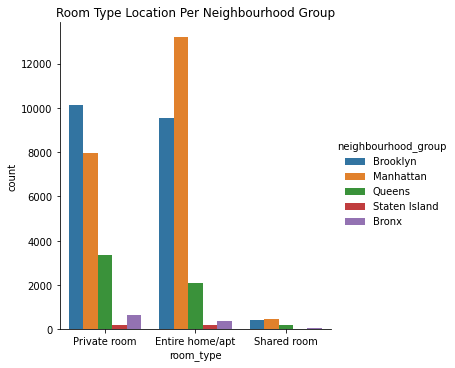

In [ ]:
title = 'Room Type Location Per Neighbourhood Group'
plt.figure(figsize=(10,10))
sns.catplot(x='room_type', kind='count', hue='neighbourhood_group', data = airbnb_data)
plt.title(title)
plt.show()

## **3.3  Price Relation To Neighbourhood Group**

<function matplotlib.pyplot.show(*args, **kw)>

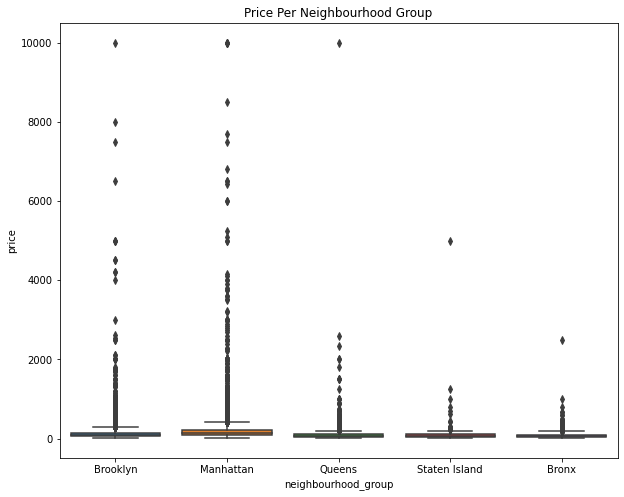

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='neighbourhood_group',y='price', data=airbnb_data)
plt.title('Price Per Neighbourhood Group')
plt.show

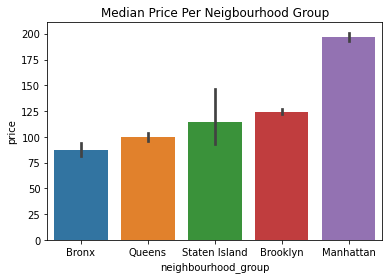

In [ ]:
title = 'Median Price Per Neigbourhood Group'
result = airbnb_data.groupby(['neighbourhood_group'])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group',y='price',data=airbnb_data, order=result['neighbourhood_group'])
plt.title(title)
plt.show()

## **3.4  Price Relation To Room Type**

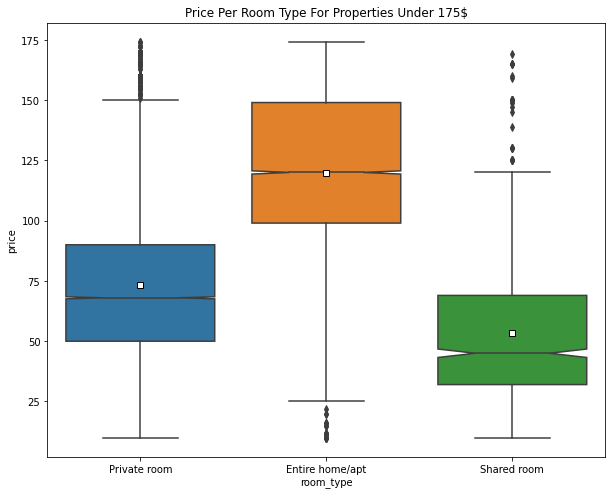

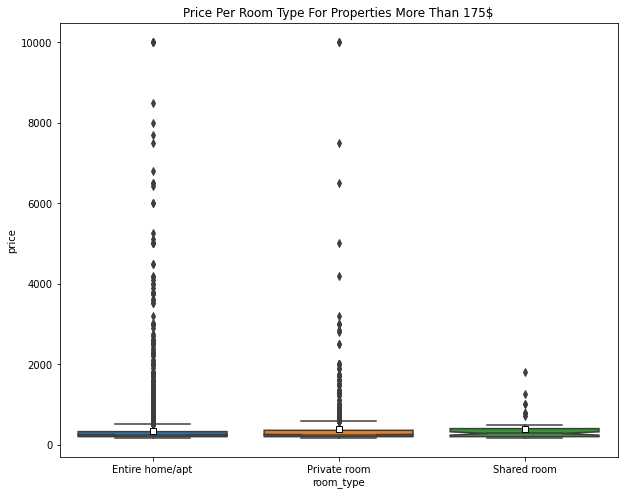

In [ ]:
title = 'Price Per Room Type For Properties Under 175$'
airbnb_data_filtered = airbnb_data.loc[airbnb_data['price']<175]
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='room_type',y='price',data=airbnb_data_filtered,notch=True,showmeans=True,meanprops={'marker':'s','markerfacecolor':'white','markeredgecolor':'black'})
plt.title(title)
plt.show()


title = 'Price Per Room Type For Properties More Than 175$'
airbnb_data_filtered1 = airbnb_data.loc[airbnb_data['price']>175]
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x='room_type',y='price',data=airbnb_data_filtered1,notch=True,showmeans=True,meanprops={'marker':'s','markerfacecolor':'white','markeredgecolor':'black'})
plt.title(title)
plt.show()

## **3.4 Price Relation To The Number Of Review Per Month**

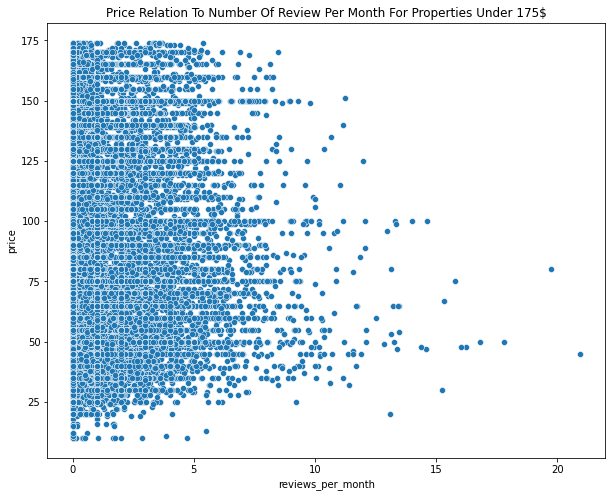

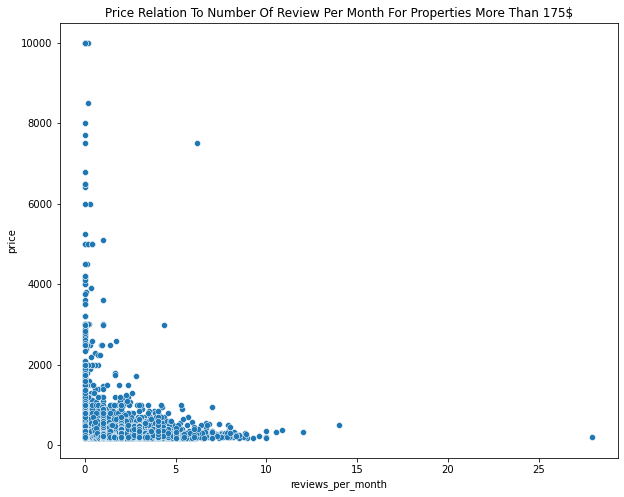

In [ ]:
airbnb_data_filtered2 = airbnb_data.loc[(airbnb_data['price']<175) & (airbnb_data['reviews_per_month']<30)]
title = 'Price Relation To Number Of Review Per Month For Properties Under 175$'
f, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='reviews_per_month',y='price',data=airbnb_data_filtered2)
plt.title(title)
plt.show()


airbnb_data_filtered3 = airbnb_data.loc[airbnb_data['price']>175]
title = 'Price Relation To Number Of Review Per Month For Properties More Than 175$'
f, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='reviews_per_month',y='price',data=airbnb_data_filtered3)
plt.title(title)
plt.show()